## Initialise dependencies

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Utils

### Function to calculate derivative

In [2]:
class DerivativeError(Exception):
    def __init__(self, message):
        super().__init__(message)

def calculate_difference(points):
    d_points = []
    for i in range(0,len(points)-1):
        p1 = points[i]
        p2 = points[i+1]
        d_points.append(p2-p1)
    return d_points
    
def differentiate(x, y):
    if len(x) != len(y):
        raise DerivativeError('Unequal datapoints in the dataset')
    d_x = calculate_difference(x)
    d_y = calculate_difference(y)
    return np.divide(d_y, d_x)

## Engineering Strain v/s Engineering Stress

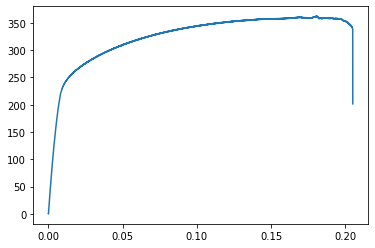

In [3]:
x_label = 'Engineering Strain'
y_label = 'Engineering Stress'
dataset = pd.read_csv('./tensile_test_data.csv', sep='\t', names=[x_label, y_label])
x = dataset[x_label]
y = dataset[y_label]
plt.plot(x,y)

### Fit a polynomial curve onto the original curve

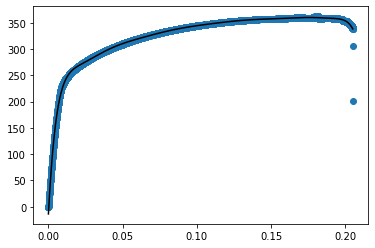

In [40]:
coefs = np.polyfit(x, y, 12)
plt.figure()
plt.plot(x, np.polyval(coefs, x), color="black")
plt.scatter(x,y)
plt.show()